(397691, 30, 5)
(397691, 1)
(278383, 30, 5, 1)
(119308, 30, 5, 1)


Using TensorFlow backend.
/home/lab23/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab23/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab23/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab23/.local/lib/python3.6/site-packages/tensorflow/python/fra

[0. 0. 0. ... 0. 0. 0.]
{0: 0.42926753296417774, 1: 3.023404578826187, 2: 2.9437958674364992}
(278383, 3)
(119308, 3)


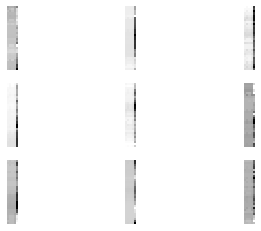


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 30, 5, 1)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 5, 64)         640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 5, 64)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 2, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 2, 128)        73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 15, 2, 128)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 1, 128)         0  

 - 60s - loss: 0.9656 - accuracy: 0.3664 - val_loss: 1.1185 - val_accuracy: 0.3421

Epoch 00033: val_accuracy did not improve from 0.38834
Epoch 34/100
 - 59s - loss: 0.9625 - accuracy: 0.3678 - val_loss: 1.0545 - val_accuracy: 0.3123

Epoch 00034: val_accuracy did not improve from 0.38834
Epoch 35/100
 - 60s - loss: 0.9589 - accuracy: 0.3698 - val_loss: 1.0389 - val_accuracy: 0.3166

Epoch 00035: val_accuracy did not improve from 0.38834
Epoch 36/100
 - 60s - loss: 0.9554 - accuracy: 0.3734 - val_loss: 1.0792 - val_accuracy: 0.3207

Epoch 00036: val_accuracy did not improve from 0.38834
Epoch 37/100
 - 60s - loss: 0.9523 - accuracy: 0.3750 - val_loss: 1.0784 - val_accuracy: 0.3429

Epoch 00037: val_accuracy did not improve from 0.38834
Epoch 38/100
 - 60s - loss: 0.9492 - accuracy: 0.3778 - val_loss: 1.0249 - val_accuracy: 0.3500

Epoch 00038: val_accuracy did not improve from 0.38834
Epoch 39/100
 - 59s - loss: 0.9465 - accuracy: 0.3810 - val_loss: 1.0131 - val_accuracy: 0.3441

Epoc


Epoch 00086: val_accuracy did not improve from 0.39944
Epoch 87/100
 - 58s - loss: 0.8322 - accuracy: 0.4563 - val_loss: 1.1326 - val_accuracy: 0.3503

Epoch 00087: val_accuracy did not improve from 0.39944
Epoch 88/100
 - 57s - loss: 0.8300 - accuracy: 0.4580 - val_loss: 0.9299 - val_accuracy: 0.3504

Epoch 00088: val_accuracy did not improve from 0.39944
Epoch 89/100
 - 58s - loss: 0.8283 - accuracy: 0.4574 - val_loss: 1.3516 - val_accuracy: 0.3472

Epoch 00089: val_accuracy did not improve from 0.39944
Epoch 90/100
 - 58s - loss: 0.8267 - accuracy: 0.4596 - val_loss: 1.1913 - val_accuracy: 0.3460

Epoch 00090: val_accuracy did not improve from 0.39944
Epoch 91/100
 - 58s - loss: 0.8247 - accuracy: 0.4603 - val_loss: 1.3963 - val_accuracy: 0.3398

Epoch 00091: val_accuracy did not improve from 0.39944
Epoch 92/100
 - 58s - loss: 0.8228 - accuracy: 0.4614 - val_loss: 1.4255 - val_accuracy: 0.3582

Epoch 00092: val_accuracy did not improve from 0.39944
Epoch 93/100
 - 58s - loss: 0.82

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.misc 
from math import sqrt 
import itertools
from IPython.display import display
%matplotlib inline

input_data_length = 30
model_num = 79
num_classes = 3

Made_X = np.load('Made_X/Made_X %s_%s.npy' % (input_data_length, model_num))
Made_Y = np.load('Made_X/Made_Y %s_%s.npy' % (input_data_length, model_num)).reshape(-1, 1)


#       dataset 분리      #
# dataX 구성 : VOLUME, MA, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
# dataX 구성 : VOLUME, EMA1, EMA2, CMO, OBV, RSI, MACD, MACD_SIGNAL, MACD_OSC 
Made_X = Made_X[:, :,[0,1,2,3,6]]
print(Made_X.shape)
print(Made_Y.shape)

row = Made_X.shape[1]
col = Made_X.shape[2]

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(Made_X, Made_Y, test_size=0.3,
                                                   shuffle=False)

X_train = X_train.astype('float32').reshape(-1, input_data_length, col, 1)
X_val = X_val.astype('float32').reshape(-1, input_data_length, col, 1)
print(X_train.shape)
print(X_val.shape)

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 

# Data Class Weight
from sklearn.utils import class_weight

print(Y_train[:, 0])
class_weights = class_weight.compute_class_weight('balanced', 
                                                  np.unique(Y_train[:, 0]),
                                                  Y_train[:, 0])
class_weights = dict(enumerate(class_weights))
# class_weights[1] *= 0.97
# class_weights[2] *= 0.97
print(class_weights)
# quit()

Y_train = Y_train.astype('float32')
Y_val = Y_val.astype('float32')
Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_val = np_utils.to_categorical(Y_val, num_classes)
print(Y_train.shape)
print(Y_val.shape)

datagen = ImageDataGenerator( 
#     rotation_range = 60,
#     zoom_range = 0.6,
#     shear_range = 0.6,
#     horizontal_flip = True,
#     width_shift_range=0.6,
#     height_shift_range=0.6,
    fill_mode = 'nearest'
    )

testgen = ImageDataGenerator( 
    )
datagen.fit(X_train)
batch_size = 128

for X_batch, _ in datagen.flow(X_train, Y_train, batch_size=9):
    for i in range(0, 9): 
        pyplot.axis('off') 
        pyplot.subplot(330 + 1 + i) 
        pyplot.imshow(X_batch[i].reshape(input_data_length, col), cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off') 
    pyplot.show() 
    break
    
    
train_flow = datagen.flow(X_train, Y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, Y_val, batch_size=batch_size) 


from keras.utils import plot_model
import keras.backend as K
from keras.models import Model, Sequential
import keras.layers as layers
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix

def FER_Model(input_shape=(row, col, 1)):
    # first input model
    visible = layers.Input(shape=input_shape, name='input')
    
    net = layers.Conv2D(64, kernel_size=3, padding='same')(visible)
    # net = layers.Activation('relu')(net)
    net = layers.LeakyReLU()(net)
    net = layers.MaxPool2D(pool_size=2)(net)

    shortcut_1 = net

    net = layers.Conv2D(128, kernel_size=3, padding='same')(net)
    # net = layers.Activation('relu')(net)
    net = layers.LeakyReLU()(net)
    net = layers.MaxPool2D(pool_size=2)(net)

    shortcut_2 = net

#     net = layers.Conv2D(256, kernel_size=3, padding='same')(net)
#     # net = layers.Activation('relu')(net)
#     net = layers.LeakyReLU()(net)
#     net = layers.MaxPool2D(pool_size=2)(net)

#     shortcut_3 = net

#     net = layers.Conv2D(128, kernel_size=1, padding='same')(net)
#     # net = layers.Activation('relu')(net)
#     net = layers.LeakyReLU()(net)
#     net = layers.MaxPool2D(pool_size=2)(net)

    net = layers.Flatten()(net)
    net = layers.Dense(64)(net)
    net = layers.LeakyReLU()(net)
    net = layers.Dense(num_classes, activation='softmax')(net)

    # create model 
    model = Model(inputs =visible, outputs = net)
    # summary layers
    print(model.summary())
    
    return model

model = FER_Model()
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
filepath="model/rapid_ascending %s_%s_cmo.hdf5" % (input_data_length, model_num)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
checkpoint2 = TensorBoard(log_dir='Tensorboard_graph',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
checkpoint3 = EarlyStopping(monitor='val_accuracy', patience=50)
callbacks_list = [checkpoint, checkpoint2, checkpoint3]

# keras.callbacks.Callback 로 부터 log 를 받아와 history log 를 작성할 수 있다.

# we iterate 200 times over the entire training set
num_epochs = 100
history = model.fit_generator(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,  
                    verbose=2,  
                    callbacks=callbacks_list,
                    class_weight=class_weights,
                    validation_data=val_flow,  
                    validation_steps=len(X_val) / batch_size,
                    shuffle=False)



In [ ]:
from keras.models import load_model

model = load_model('model/rapid_ascending %s_%s.hdf5' % (input_data_length, model_num))
# model = load_model('/content/gdrive/My Drive/Colab Notebooks/model/rapid_ascending %s.hdf5' % input_data_length)
# loss = model.evaluate_generator(test_flow, steps=len(X_test) / batch_size) 
# print("Test Loss " + str(loss[0]))
# print("Test Acc: " + str(loss[1]))

# loss = model.evaluate(X_val, Y_val) 
# print(X_val.shape)
# print(Y_val.shape)

# print("Val Loss " + str(loss[0]))
# print("Val Acc: " + str(loss[1]))

#     Prediction    #
Y_pred_ = model.predict(X_test, verbose=1)

# Y_pred = Y_pred_[:,[-1]]
# print(Y_pred.shape)
# print(Y_test.shape)
Y_pred = np.argmax(Y_pred_, axis=1)
t_te = np.argmax(Y_test, axis=1)

#     Manual processing     #
Y_pred_one = Y_pred_[:, [-1]]
print(Y_pred_)
max_value = np.max(Y_pred_one)
print(max_value)

limit_line = 0.9
Y_pred_one = np.where(Y_pred_one > max_value * limit_line, 1, 0)

# print(Y_pred_one)
Y_pred_one = Y_pred_one.reshape(-1,)
# print(Y_pred_1)
# print(Y_pred.shape)
# print(t_te.shape)

# fail = 0
# fail2 = 0
# for i in range(len(Y_pred)):
#   if Y_pred_1[i] != t_te[i]:
#     fail += 1

#   if Y_pred[i] != t_te[i]:
#     fail2 += 1

# print(1 - fail / len(Y_pred))
# print(1 - fail2 / len(Y_pred))

# print(np.sum(Y_pred), np.sum(t_te))
# print('Y_pred / Y_test :', np.sum(Y_pred) / np.sum(t_te))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(100,10))
plt.subplot(211)
plt.plot(Y_test, 'purple', label='test')

plt.subplot(212)
plt.plot(Y_pred_one, 'y', label='pred')
plt.show()
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/model/rapid_ascending %s.png' % input_data_length)
# plt.close()